# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  


### Step 1. Import the necessary libraries

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2. Import the dataset

### Step 3. Assign it to a variable titanic

In [112]:
# Import data using pandas
titanic= pd.read_csv("https://raw.githubusercontent.com/shans28/pandas-viz-stats-practice/refs/heads/main/data/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set PassengerId as the index

In [4]:
titanic.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [107]:
# titanic["Sex"].value_counts()
titanic["Sex"].value_counts().index

Index(['male', 'female'], dtype='object', name='Sex')

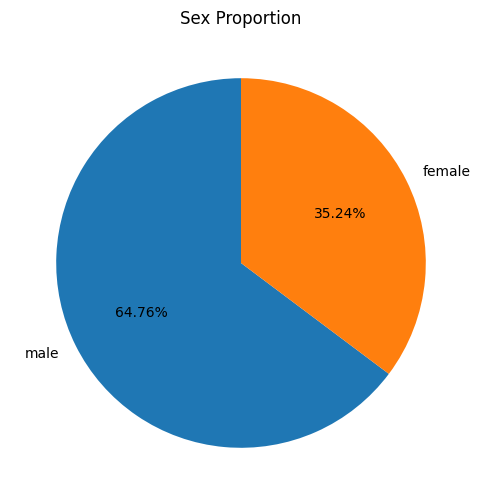

In [7]:
plt.figure(figsize=(6,6))
plt.pie(titanic["Sex"].value_counts(),labels=titanic["Sex"].value_counts().index,autopct="%1.2f%%", startangle=90)
plt.title("Sex Proportion")
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

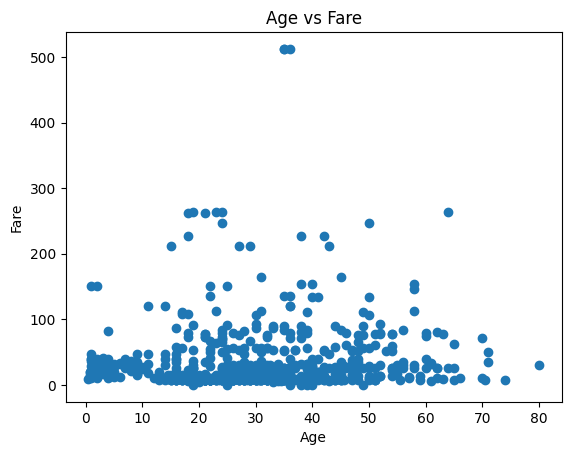

In [10]:
plt.scatter(titanic["Age"], titanic["Fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.show()

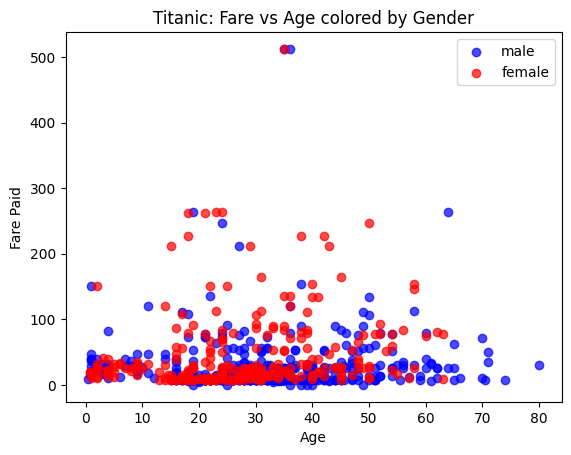

In [12]:
for gender, color in zip(["male", "female"], ["blue", "red"]):
    subset = titanic[titanic["Sex"] == gender]
    plt.scatter(subset["Age"], subset["Fare"], c=color, label=gender, alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Fare Paid")
plt.title("Titanic: Fare vs Age colored by Gender")
plt.legend()
plt.show()

### Step 7. How many people survived?

In [14]:
titanic["Survived"].value_counts()[1]

np.int64(342)

### Step 8. Create a histogram with the Fare payed

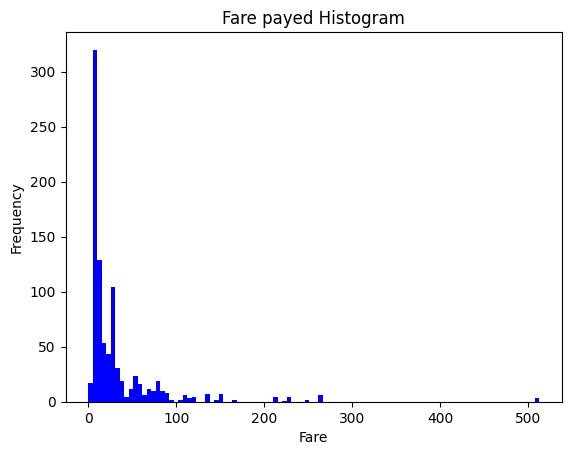

In [17]:
plt.hist(titanic["Fare"], bins=100, color="blue")
plt.title("Fare payed Histogram")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

### Gender wise Survival of passsengers

Sex
female    233
male      109
Name: 1, dtype: int64


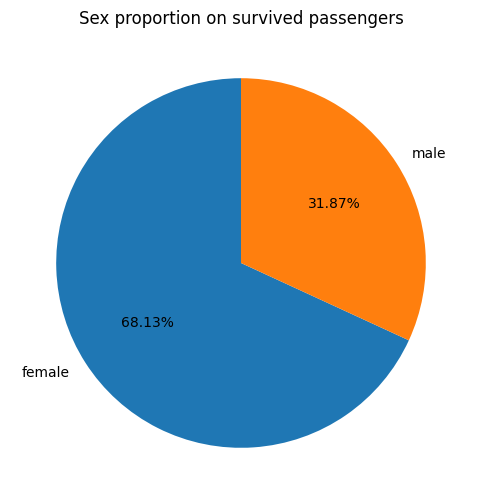

In [58]:
grouped_by_gender=titanic.groupby("Sex")
survive_on_gender=grouped_by_gender["Survived"].value_counts()
survive_on_gender=survive_on_gender.unstack()
survive_on_gender = survive_on_gender[1]
print(survive_on_gender)
plt.figure(figsize=(6,6))
plt.pie(survive_on_gender,labels=survive_on_gender.index,autopct="%1.2f%%", startangle=90)
plt.title("Sex proportion on survived passengers")
plt.show()

### Number of Survivors by Gender

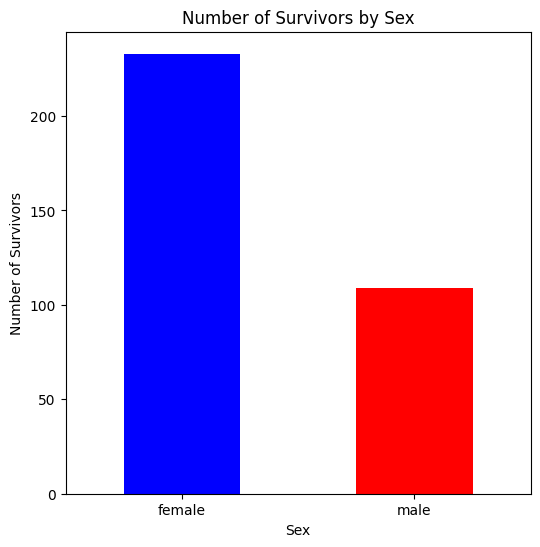

In [59]:
plt.figure(figsize=(6,6))
survive_on_gender.plot(kind='bar', color=['blue', 'red'])
survive_on_gender[titanic['Sex']]
plt.title("Number of Survivors by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Survivors")
plt.xticks(rotation=0)
plt.show()

### How many passengers survived by class


<Axes: xlabel='Pclass'>

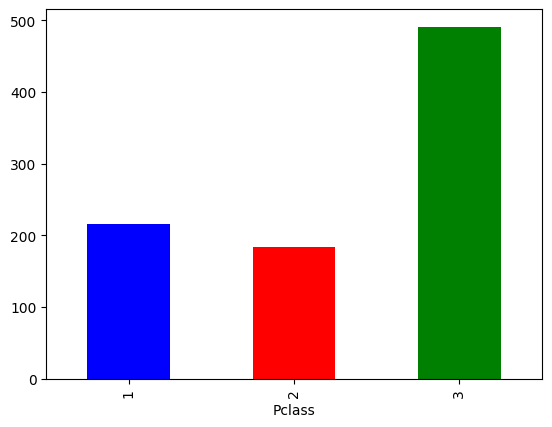

In [108]:
grouped_by_class=titanic.groupby(["Pclass"])
grouped_by_class["PassengerId"].count().plot(kind='bar', color=['blue', 'red', 'green'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Figure size 600x600 with 0 Axes>

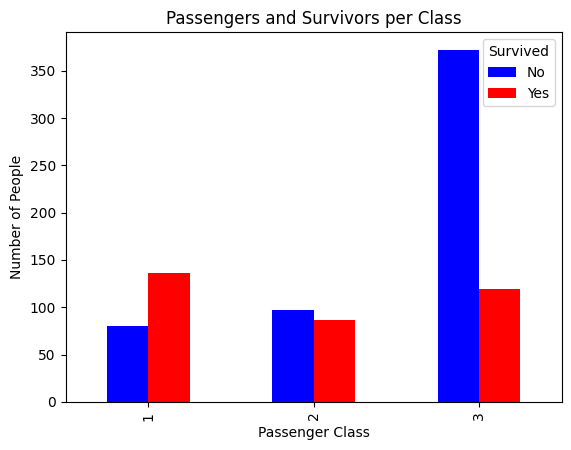

In [96]:
plt.figure(figsize=(6,6))
grouped_by_class=titanic.groupby(["Pclass", "Survived"]).size().unstack(fill_value=0)
display(grouped_by_class)
# grouped_by_class["PassengerId"].count().plot(kind='bar', color=['blue', 'red', 'green'])
grouped_by_class.plot(kind='bar', color=['blue', 'red'])
plt.title("Passengers and Survivors per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of People")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

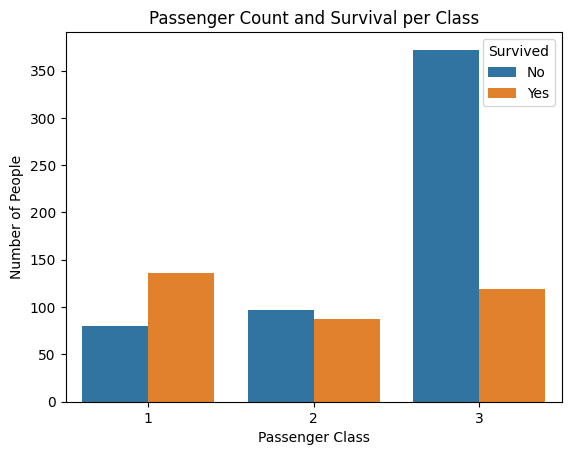

In [109]:
#Same using Seaborn
titanic = sns.load_dataset("titanic")
sns.countplot(data=titanic, x="pclass", hue="survived")
plt.title("Passenger Count and Survival per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of People")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Create a Scatterplot by Age, Fare and Survivors

Text(0.5, 1.0, 'Passenger Count and Survival per Class')

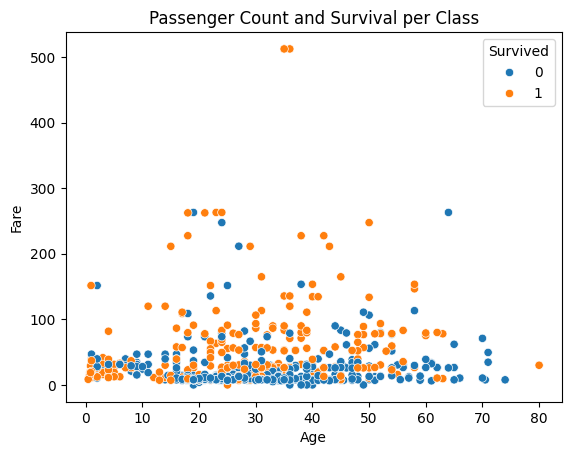

In [114]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=titanic)
plt.title("Passenger Count and Survival per Class")

### Create a Heatmap by Age, Fare and Survivors

<Axes: xlabel='Pclass', ylabel='Sex'>

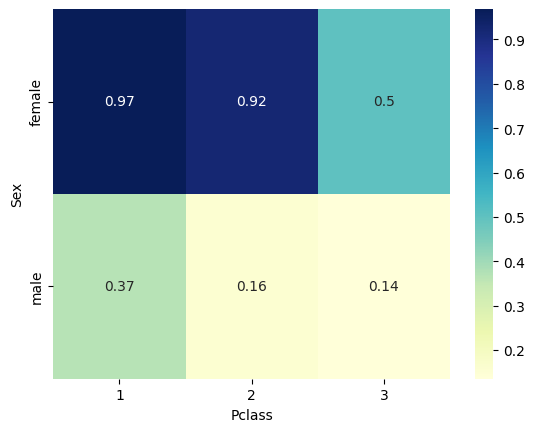

In [102]:
sns.heatmap(
    titanic.pivot_table(index="Sex", columns="Pclass", values="Survived"),
    annot=True, cmap="YlGnBu"
)
